# <center>Generating a consensus Kidney</center>

##### Loading the required modules

In [ ]:
import ants
import trimesh
import stl
import numpy as np
import vtkplotter as vtk
import os
import pandas as pd
from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

### Mapping two Female Kidneys
**Note**: Nomenclature of the mappings is in the format: **fixed_moving**
- VHF_Kidney_L: fl
- VHF_Kidney_R: fr
- VHM_Kidney_L: ml
- VHM_Kidney_R: mr


In [ ]:
img1=ants.image_read(os.path.join(data_dir,'VHF_Kidney_L_High.nii.gz'))
img2=ants.image_read(os.path.join(data_dir,'VHF_Kidney_R_High.nii.gz'))

##### VHF_Kidney_L mapped on VHF_Kidney_R

In [ ]:
mytx = ants.registration(fixed=img1, moving=img2, type_of_transform = 'SyN' )
fl_fr = ants.apply_transforms(fixed=img1, moving=img2, transformlist=mytx['fwdtransforms'])

Fixed: VHF_Kidney_L
Moving: VHF_Kidney_R

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (448, 657, 475)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



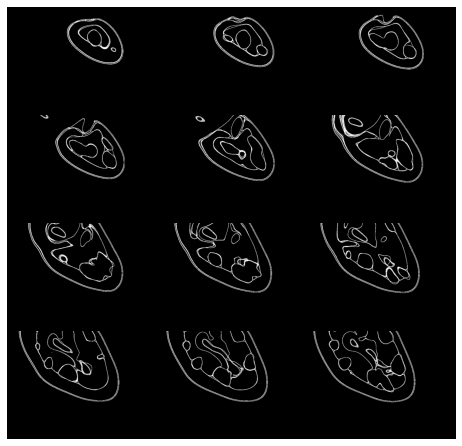

In [ ]:
print(f'Fixed: VHF_Kidney_L\nMoving: VHF_Kidney_R\n')
print(fl_fr)
ants.plot(fl_fr)

##### VHF_Kidney_R mapped on VHF_Kidney_L

In [ ]:
mytx = ants.registration(fixed=img2, moving=img1, type_of_transform = 'SyN' )
fr_fl = ants.apply_transforms(fixed=img2, moving=img1, transformlist=mytx['fwdtransforms'])

Fixed: VHF_Kidney_R
Moving: VHF_Kidney_L

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (451, 519, 427)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



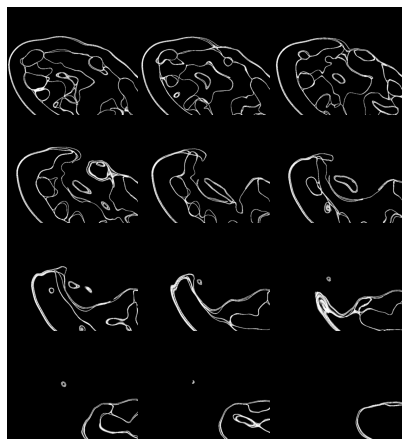

In [ ]:
print(f'Fixed: VHF_Kidney_R\nMoving: VHF_Kidney_L\n')
print(fr_fl)
ants.plot(fr_fl)

### Mapping two Male Kidneys

In [ ]:
img1=ants.image_read(os.path.join(data_dir,'VHM_Kidney_L_High.nii.gz'))
img2=ants.image_read(os.path.join(data_dir,'VHM_Kidney_R_High.nii.gz'))

##### VHM_Kidney_L mapped on VHM_Kidney_R

In [ ]:
mytx = ants.registration(fixed=img2, moving=img1, type_of_transform = 'SyN' )
mr_ml = ants.apply_transforms(fixed=img2, moving=img1, transformlist=mytx['fwdtransforms'])

Fixed: VHM_Kidney_R
Moving: VHM_Kidney_L

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (42, 71, 49)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



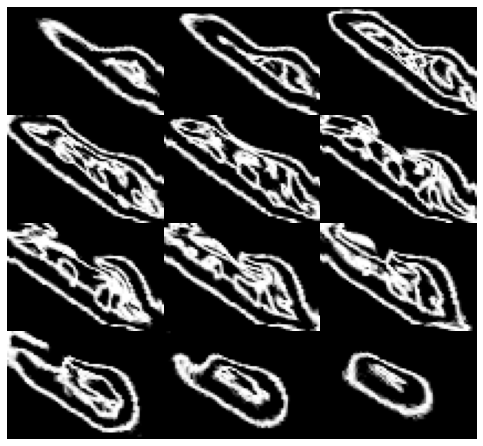

In [ ]:
print(f'Fixed: VHM_Kidney_R\nMoving: VHM_Kidney_L\n')
print(mr_ml)
ants.plot(mr_ml)

##### VHM_Kidney_R mapped on VHM_Kidney_L

In [ ]:
mytx = ants.registration(fixed=img1, moving=img2, type_of_transform = 'SyN' )
ml_mr = ants.apply_transforms(fixed=img1, moving=img2, transformlist=mytx['fwdtransforms'])

Fixed: VHM_Kidney_L
Moving: VHM_Kidney_R

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (49, 91, 61)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



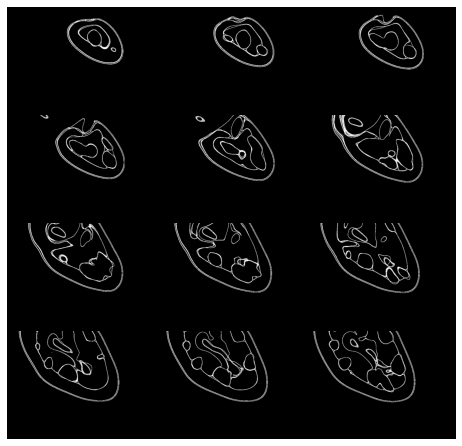

In [ ]:
print(f'Fixed: VHM_Kidney_L\nMoving: VHM_Kidney_R\n')
print(ml_mr)
ants.plot(fl_fr)

##### Saving the mappings to NIfTI files

In [ ]:
ants.image_write(fr_fl,'fr_fl.nii.gz')
ants.image_write(fl_fr,'fl_fr.nii.gz')
ants.image_write(mr_ml,'mr_ml.nii.gz')
ants.image_write(ml_mr,'ml_mr.nii.gz')

###### Mapping VHF_R with MR_ML

In [5]:
img1=ants.image_read(os.path.join(data_dir,'mr_ml.nii.gz'))
img2=ants.image_read(os.path.join(data_dir,'VHF_Kidney_R_High.nii.gz'))

In [7]:
mytx = ants.registration(fixed=img1, moving=img2, type_of_transform = 'SyN')
mr_ml_fr= ants.apply_transforms(fixed=img1, moving=img2, transformlist=mytx['fwdtransforms'])

In [9]:
mr_ml_fr

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (42, 71, 49)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

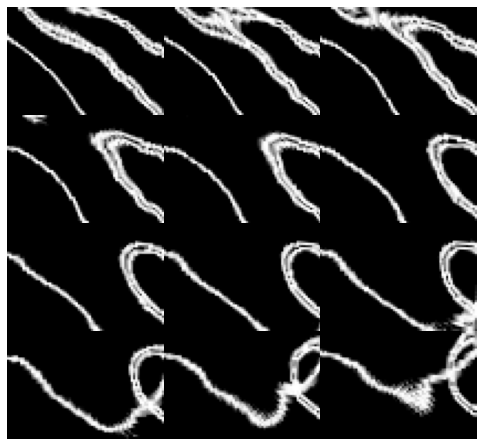

In [10]:
ants.plot(mr_ml_fr)